## 機械学習のアルゴリズム

7種類の機械学習のアルゴリズムを紹介する。

- サポートベクトル回帰 SVR
- カーネルリッジ回帰 KRR
- ナイーブ・ベイズ (GaussianNB, MultinomialNB, BernoulliNB)
- 決定木分類器 DecisionTreeClassifier
- 3つの近傍法 (KNighborsRegressor, KNeighborsClassifier, RadiusNeighborsClassifier)
- 確率的勾配降下法 SGDCClassifier
- ディープラーニングニューラルネットワーク Keras

これらの機械学習手法では、我々が重回帰モデルを提供する必要がない。入出力関数モデルを自動的に構築する。

### 2.0 サポートベクトル回帰 SVR(Support Vector Regression)

サポートベクトル回帰SVRでは、SVRでは、学習器のパラメーター設定が極めて重要となる。

SVRアルゴリズムには複数のパラメーターが用意されていて、いちばん重要なのなは、C(ペナルティパラメーター)の値である。

サポートベクトル回帰の機械学習モデルclfは、次の式で表す。

clf = SVR(C=1e7, epsilon=.01, max_iter=-1, tol=1e-7, verbose=1, gamma=10.1)

サポートベクトル回帰のアルゴリズムには、kernel='linear', kernel='poly', kernel='rbf' の3つの評価関数(Kernel)が用意されている。

linearは線形関数、polyは多項式関数、rbfはradial basis functionと呼ばれている。

[LibSVM]0.969019753108


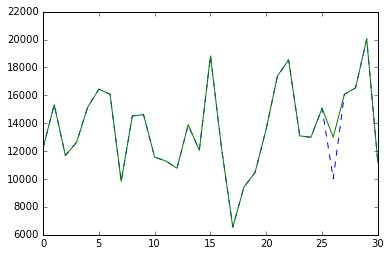

In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
% matplotlib inline
import matplotlib.pyplot as plt
import re, os

data = pd.read_csv('../data/ice.csv')
x = data[['temp', 'street']]
y = data['ice']

clf = SVR(kernel='rbf', C=1e7, epsilon=.01, max_iter=-1, tol=1e-7, verbose=1, gamma=10.1).fit(x,y)
print(clf.score(x,y))
t = np.arange(0.0, 31.0)
plt.plot(t, y, '--', t, clf.predict(x), '-')
plt.show()

R-squared値が0.97と高くなる。

### 2.1 カーネルリッジ回帰 KRR

サポートベクトル回帰SVRに比べて、パラメータの設定は複雑ではない。

Kernel-Ridge アルゴリズムのalpha パラメーターは、SVRアルゴリズムのペナルティパラメータCの((2*C) -1) に相当する。

カーネルリッジ回帰の機械学習モデルclfは、次のように定義する。

clf = KernelRidge(kernel='rbf', alpha=1e-8).fit(x,y)

0.984509772248


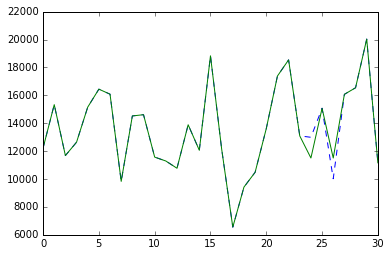

In [2]:
import pandas as pd
import numpy as np
from sklearn.kernel_ridge import KernelRidge
%matplotlib inline
import matplotlib.pyplot as plt

data = pd.read_csv('../data/ice.csv')
x = data[['temp', 'street']]
y = data['ice']

clf = KernelRidge(kernel='rbf', alpha=1e-8).fit(x,y)
print(clf.score(x,y))
t=np.arange(0.0, 31.0)
plt.plot(t, y, '--', t, clf.predict(x), '-')
plt.show()

SVRよりもR-squared値が向上している

### 2.2 ナイーブ・ベイズ sklearn.naive_bayes 機械学習

ナイーブ・ベイズのアルゴリズムは、広く使われている機械学習手法。

ナイーブ・ベイズには3つの評価関数がある。
- GaussianNB
- MultinomialNB
- BernoulliNB

ガウジアン・ナイーブ・ベイズ（GaussianNB)の機械学習モデル clfは、次のように定義する。

clf = GaussianNB()

0.967741935484


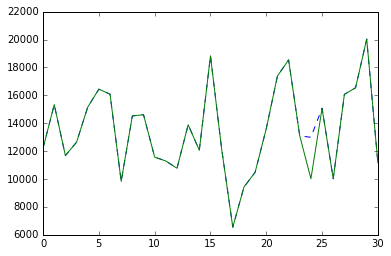

In [3]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
%matplotlib inline
import matplotlib.pyplot as plt

data = pd.read_csv('../data/ice.csv')
x = data[['temp', 'street']]
y = data['ice']

clf = GaussianNB()
clf.fit(x,y)
print(clf.score(x,y))
t=np.arange(0.0, 31.0)
plt.plot(t, data['ice'], '--', t, clf.predict(x), '-')
plt.show()

MultinomialNB機械学習モデルclfは次式で表現する。

clf = MultinomialNB(alpha=1e-3)

0.967741935484


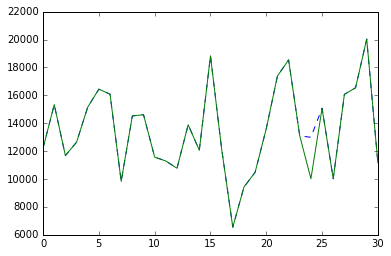

In [5]:
from math import *
import pandas as pd
import numpy as np
from sklearn.naive_bayes import MultinomialNB
%matplotlib inline
import matplotlib.pyplot as plt

data = pd.read_csv('../data/ice.csv')
x = data[['temp', 'street']]
y = data['ice']

clf = MultinomialNB(alpha=1e-3)
clf.fit(x, y)
print(clf.score(x,y))
t=np.arange(0.0, 31.0)
plt.plot(t, data['ice'], '--', t, clf.predict(x), '-')
plt.show()

BernoulliNB機械学習モデルclfは、次式で表現する。

clf = BernoulliNB()

BernouliNBを使う場合は、入力xをそのまま使うのではなく、入力xから特徴抽出して、その特徴抽出したxを入力として利用する。

ここでは、RBFSampler関数を使って、次の方法で、xから特徴抽出xに変換する。

RBFSampler関数以外には、Nystroem関数がある。この関数は、RBFSampler関数よりも計算時間がかかるが、正確な結果を出す。

0.967741935484


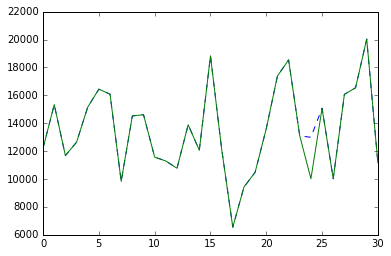

In [6]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import BernoulliNB
from sklearn.kernel_approximation import RBFSampler
%matplotlib inline
import matplotlib.pyplot as plt

data = pd.read_csv('../data/ice.csv')
x = data[['temp', 'street']]
rbf_feature = RBFSampler()
x_features = rbf_feature.fit_transform(x)
y = data['ice']

clf = BernoulliNB()
clf.fit(x_features, y)
print(clf.score(x_features,y))
t=np.arange(0.0, 31.0)
plt.plot(t, y, '--', t, clf.predict(x_features), '-')
plt.show()

### 2.3 決定木分類器 DecisionTreeClassifier

決定木分類器の機械学習モデルclfは、次式で定義する。

clf = DecisionTreeClassifier().fit(x,y)

そして、clf.feature_importances関数は、出力に対しての入力変数の重要度を提供してくれる。

0.967741935484
[ 0.31034483  0.68965517]


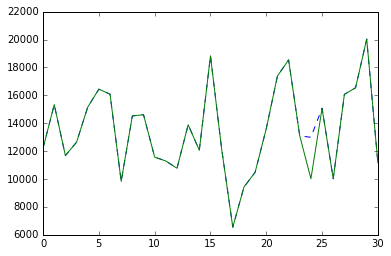

In [7]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline
import matplotlib.pyplot as plt

data = pd.read_csv('../data/ice.csv')
x = data[['temp', 'street']]
y = data['ice']

clf = DecisionTreeClassifier().fit(x,y)
print(clf.score(x,y))
print(clf.feature_importances_)
t=np.arange(0.0, 31.0)
plt.plot(t, data['ice'], '--', t, clf.predict(x), '-')
plt.show()

feature of importancesの結果は、通行人数のほうが最高気温よりも4倍ほど重要度が高いことを示している。

つまり、通行人数のほうが最高気温よりもアイスクリームの売上に大きく関わってくる。

### 2.4 近傍法

ここでは、3つの近傍法を紹介する。
- KNeighborsRegressor
- KNeighborsClassifier
- RadiusNeighborsClassifier

まず、近傍法KNeighborsRegressorの機械学習モデルclfは、次式で表現できる。

clf = KNeighborsRegressor(n_neighbors=1)

0.969019544495


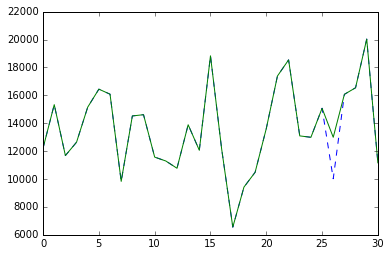

In [8]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
%matplotlib inline
import matplotlib.pyplot as plt

data = pd.read_csv('../data/ice.csv')
x = data[['temp', 'street']]
y = data['ice']

clf = KNeighborsRegressor(n_neighbors=1)
est = clf.fit(x,y)
print(clf.score(x,y))
t=np.arange(0.0, 31.0)
plt.plot(t, y, '--', t, clf.predict(x), '-')
plt.show()

近傍法KNeighborsClassifierの機械学習モデルclfは、次式で定義できる。

clf = KNeighborsClassifier(n_neighbors=1)

0.967741935484


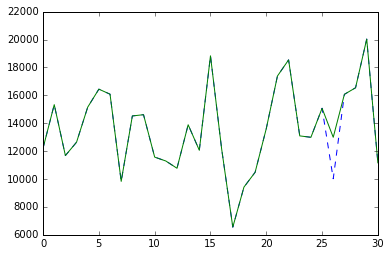

In [9]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline
import matplotlib.pyplot as plt

data = pd.read_csv('../data/ice.csv')
x = data[['temp', 'street']]
y = data['ice']

clf = KNeighborsClassifier(n_neighbors=1)
est = clf.fit(x,y)
print(clf.score(x,y))
t=np.arange(0.0, 31.0)
plt.plot(t, y, '--', t, clf.predict(x), '-')
plt.show()

近傍法のRadiusNeighborsClassifier機械学習モデルclfは、次式で表現できる。

clf = RadiusNeighborsClassifier()

0.967741935484


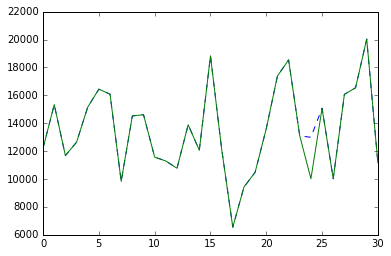

In [10]:
import pandas as pd
import numpy as np
from sklearn.neighbors import RadiusNeighborsClassifier
%matplotlib inline
import matplotlib.pyplot as plt

data = pd.read_csv('../data/ice.csv')
x = data[['temp', 'street']]
y = data['ice']

clf = RadiusNeighborsClassifier()
clf.fit(x,y)
print(clf.score(x,y))
t=np.arange(0.0, 31.0)
plt.plot(t, y, '--', t, clf.predict(x), '-')
plt.show()

### 2.5 確率的勾配降下法SGDClassifier

このアルゴリズムでは、入力xを使わず、いったん入力xから特徴抽出し、その特徴抽出したデータを入力とする。

入力xから特徴抽出するために、RBFSamplerライブラリを用いる。

確率的勾配降下法SGDClassifierの機械学習モデルclfは、次式で表現できる。

clf = SGDClassifier()

0.967741935484


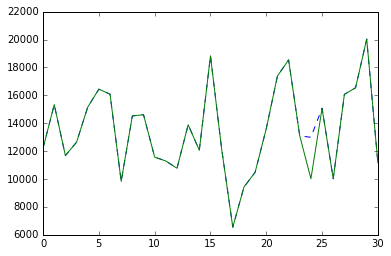

In [12]:
import pandas as pd
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.kernel_approximation import RBFSampler
%matplotlib inline
import matplotlib.pyplot as plt

data = pd.read_csv('../data/ice.csv')
x = data[['temp', 'street']]
rbf_feature = RBFSampler(gamma=1, random_state=0, n_components=100)
x_features = rbf_feature.fit_transform(x)
y = data['ice']

clf = SGDClassifier()
clf.fit(x_features,y)
print(clf.score(x_features,y))
t=np.arange(0.0, 31.0)
plt.plot(t, y, '--', t, clf.predict(x_features), '-')
plt.show()

In [13]:
# ここで、x_featuresの中身を見てみる
print(x_features)

[[-0.11452019 -0.12133566 -0.03352861 ..., -0.09180965 -0.136419
   0.02259354]
 [ 0.1244202  -0.12626502  0.14140589 ..., -0.08287272 -0.12046492
  -0.08506925]
 [ 0.05577739  0.13146323 -0.13845436 ..., -0.07159229 -0.12099029
   0.13909319]
 ..., 
 [-0.13651644 -0.13453789  0.01411174 ...,  0.11061884 -0.0047295   0.045901  ]
 [ 0.11655257  0.11356215 -0.14128982 ...,  0.02784835  0.05681645
   0.03899616]
 [ 0.1119228   0.1314945   0.11067725 ...,  0.13261968 -0.0213615
   0.03709361]]


### 2.6 ディープラーニングニューラルネットワークkeras

人工ニューラルネットは、多数のニューロンとそのニューロン間を接続するシナプス結合からなっている。最近では、さまざまなニューロンモデル、ニューラルアーキテクチャを簡単に構築できる。

ここでは、一番簡単なアーキテクチャ、フィードフォーワード型のニューラルネットを紹介する。フィードフォーワード型とは、ニューロンの出力がフィードバックして自分の入力に入ってこないアーキテクチャのこと。

フィードフォーワード型には、入力層、隠れ層、出力層の３種類がある。

ディープラーニングは、隠れ層を多段にして、性能を向上させようという試みのことを指す。

KerasのOptimizersには次の７つのアルゴリズムがある。
- SDG(Stochastic gradient descent)
- RMSprop(Root Mean Square Propagatin : リカレントニューラルネット向き)
- Adagrad(Adaptive gradient)
- Adadelta(extension of Adagrad)
- Adam(stochastic optimization)
- Admax(varient of Adam)
- Nadam(Adam RMSprop)

kerasでは、Activations関数は、活性化関数あるいは伝達関数と呼ばれる。

ニューロンの伝達関数には、次の８つの関数がある。
- softmax
- softplus
- softfign
- relu
- tanh
- sigmoid
- hard_sigmoid
- linear

それぞれの伝達関数は、次のような関数である。
- sigmoid関数 または logistic関数 : $ f(x) = 1 / (1+ \exp(-x)) $ 
- tenh関数 : $ f(x) = tanh(x) $
- softmax関数 : $ f(x) = 1 / (1+\exp(-\theta^Tx)) $
- softsign関数 : $ f(x) = x / (1 + |x| ) $
- softplus関数 : $ f(x) = \log(1 + \exp(x)) $
- relu(Rectified Linear Unit)関数 : $ f(x) = \max(0,x) $
- linear関数 : $ f(x) = x $

ニューラルネットモデルmodelは、Sequential()関数で表現できる.

また、それぞれの層の入力数、ニューロン数、出力数は、Denseコマンドで表す.

また、ニューロンの伝達関数は、例えば、activation="relu"で設定する.

model = Sequential()コマンドで、空っぽのmodelを作成する.

model.addコマンドで層を構築していく.

例えば次のコマンドは、入力数2、出力数100、ニューロンの伝達関数はreluとなる.

model.add(Dense(input_dim=2, output_dim=100, activation="relu")

次に、隠れ層を追加するには、次の2行コマンドで、100個のニューロンを加えることができる.

n_of_neurons=100

model.add(Dense(n_of_neurons, activation="relu"))

下の例では、入力は2、隠れ層が3層となっている. 出力は1.

model.compile(loss='mse', optimizer='adam')のコマンドで、学習方法をAdamに設定している.

adam = Adam(lr=1e-6)のコマンドで、学習率(learning_rate)を$ 10^-6 $に指定している.

model.fit(xnp, ynp, nb_epoch=20000, verbose=1, shuffle=True)によって、epoch(学習回数)を最大20000回にしている.

R-squaredの値は、r2_scoreライブラリを用いて計算. ニューロン数や隠れ層を変えると、実行結果も大きく変化する.

途中結果を見たくない場合は、verbose=0にする.

In [ ]:
# このプログラムはエラーが出る
# 点検中
from keras.models import Sequential
from keras.layers.core import Dense,Activation,Dropout
from keras.optimizers import Adam
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score

np.random.seed(100)
n_of_neurons = 100
model = Sequential()
model.add(Dense(input_dim=2, output_dim=n_of_neurons, activation="relu"))
model.add(Dense(n_of_neurons, activation="relu"))
model.add(Dense(n_of_neurons, activation="relu"))
model.add(Dense(n_of_neurons, activation="relu"))
model.add(Dense(1))

adam = Adam(lr=1e-6)

data = pd.read_csv("../data/ice.csv")
x = data[['temp', 'street']]
xnp = x.as_matrix()
y = data['ice']
ynp = y.as_matrix()

model.compile(loss='mse', optimizer='adam')
model.fit(xnp, ynp, nb_epoch=20000, verbose=1, shuffle=True)
# score model.evaluate(xnp, ynp, verbose=0)
print("scoe: ", r2_score(ynp, model.predict_proba(xnp)))